<h1> Harish R <br> AI & DS - A <br> 21011101046</h1>

# Midsem Solutions

## Question 1 a.

Three major Sub-systems:
1. Camera Body
2. Sensor Chip
3. Image Signal Processor (ISP)

Important functions 
performed by the DSP sub system:
1. Denoise & Sharpen
2. Gamma Correction

## Question 1 b.

1. If sum of pixel values of input image and sum of pixel values of Filtered output image,
remains approximately same after smoothing, then it means filter is redistributing
pixel values to overall intensity.
2. If sum of pixel values in sharpened image is close to 0, it means filter is emphasizing
edges and details without altering brightness, i.e., sharpening is proper.

## Question 2 a.

Kernel coefficient sum= 0.5 + 0.5 =1 (i.e., Sharpening)

Correlation: x(n) * h(n) = {0.5, 1.5, 2.5, 4, 2.} 

Convolution: x(n) * h’(n) = {0.5, 1.5, 2.5,  ,.5}

}
Sum of pixel values before convolution = Sum after convolution = 11

## Question 2 b.

To find:
If h(n) = {0.5, 0.5},→ Sum of kernel coefficients = 1, i.e., Sharpening<br>
• Σ 𝑦(𝑛)
∞
𝑘= −∞
= 11<br>
If h(n) = {0.5, -0.5}, → Sum of kernel coefficients = 0, i.e., Smoothing<br>
• Σ 𝑦(𝑛)
∞
𝑘= −∞
= 0<br>
For Sharpening, Sum of pixel values before convolution = Sum after convolution <br>
For Smoothing, Sum of pixel values of filtered image = 0

## Question 3 a.

I’(x,y) = Σ Σ 𝐼(𝑖, 𝑗)
∞
𝑗 = −∞
𝐾
∞
𝑖= −∞
(𝑥 − 𝑖, 𝑦
<br> − 𝑗)
Since kernel coefficients sum to 1, Kij =1, this implies the kernel is a smoothening
<br> kernel
Σ I’ = ΣI

## Question 3 b.

I’(x,y) = Σ Σ 𝐼(𝑖, 𝑗)
∞
𝑗 = −∞
𝐾
∞
𝑖= −∞
(𝑥 − 𝑖, 𝑦<br> − 𝑗)
Since kernel coefficients sum to 0, Kij =0, this implies the kernel is a sharpening or edge
detectio
<br>n kernel
ΣI’ = 0

## Question 4 a.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(array([100182., 100014.,  99877.,  99989., 100514.,  99388., 100089.,
        100440.,  99503., 100004.]),
 array([2.73763903e-05, 1.00002299e+00, 2.00001860e+00, 3.00001421e+00,
        4.00000982e+00, 5.00000544e+00, 6.00000105e+00, 6.99999666e+00,
        7.99999227e+00, 8.99998788e+00, 9.99998349e+00]),
 <BarContainer object of 10 artists>)

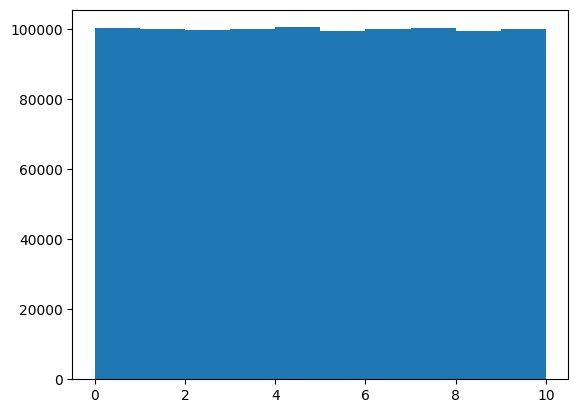

In [2]:
points_x = np.random.uniform(0,10,size = 1000000)
plt.hist(points_x)

(array([7.35858e+05, 1.94490e+05, 5.13310e+04, 1.34400e+04, 3.60200e+03,
        9.50000e+02, 2.28000e+02, 7.60000e+01, 2.10000e+01, 4.00000e+00]),
 array([2.73764278e-06, 1.33143942e+00, 2.66287609e+00, 3.99431277e+00,
        5.32574945e+00, 6.65718613e+00, 7.98862281e+00, 9.32005949e+00,
        1.06514962e+01, 1.19829328e+01, 1.33143695e+01]),
 <BarContainer object of 10 artists>)

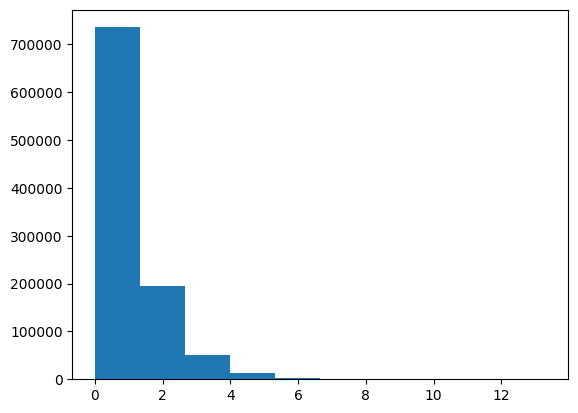

In [3]:
points_y = (-1)*np.log(1-(points_x/10)) 
plt.hist(points_y)

## Question 4 b.

In [4]:
box_filter= 1/9*np.array([[1,1,1],[1,1,1],[1,1,1]])
arr= np.array([[7,2,1],[0,0,1],[3,2,4]])

In [5]:
round(np.sum(arr*box_filter))

2

## Question 5 a.

In [6]:
image = np.array([[2, 5, 4, 3, 7],
                [0, 7, 2, 1, 1],
                [3, 0, 0, 1, 1],
                [2, 3, 2, 4, 6],
                [1, 2, 2, 4, 0]])

In [7]:
negative = 7-image
print(negative)

[[5 2 3 4 0]
 [7 0 5 6 6]
 [4 7 7 6 6]
 [5 4 5 3 1]
 [6 5 5 3 7]]


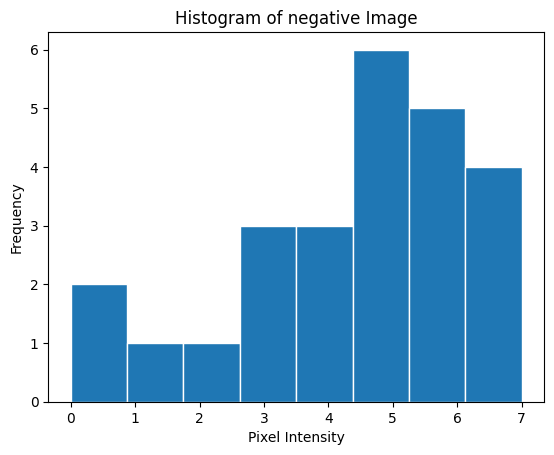

In [8]:
plt.title("Histogram of negative Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.hist(negative.flatten(), edgecolor="white", bins=8) 
plt.show() 

## Question 5 b.

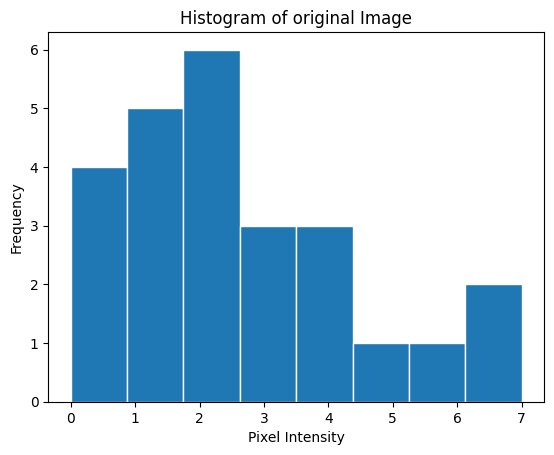

In [9]:
plt.title("Histogram of original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.hist(image.flatten(), edgecolor="white", bins=8) 
plt.show() 

In [10]:
def histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), bins=8)
    cdf = hist.cumsum()
    cdf_normalized = (cdf - cdf.min()) * 7 / (cdf.max() - cdf.min())
    equalized_image = np.interp(image.flatten(), bins[:-1], cdf_normalized)
    return np.round(equalized_image.reshape(image.shape))

In [11]:
eq_image = histogram_equalization(image)
print(eq_image)

[[4. 6. 6. 5. 7.]
 [0. 7. 4. 2. 2.]
 [5. 0. 0. 2. 2.]
 [4. 5. 4. 6. 7.]
 [2. 4. 4. 6. 0.]]


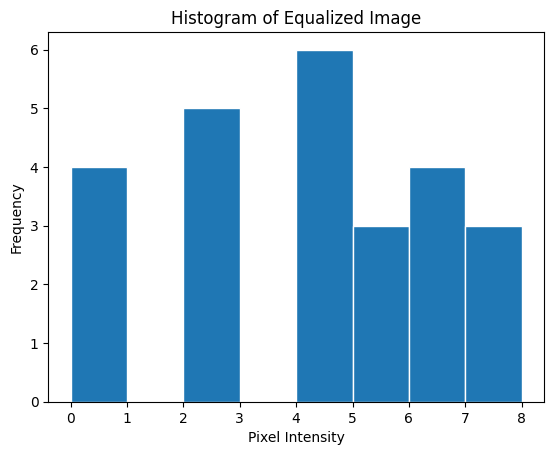

In [12]:
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.hist(eq_image.flatten(), edgecolor="white", bins=[0,1,2,3,4,5,6,7,8]) 
plt.show() 